In [2]:
import tqdm as tqdm
import voicing as vc
from tqdm import tqdm
import importlib
import formats as fmt
import numpy as np
import json

In [3]:
#Load dataset

with open('../data/formatted/meta_dataset.txt', 'r') as jsonFile:
    meta_augmented = json.load(jsonFile)
    
with open('../data/formatted/dataset_augmented.txt', 'r') as jsonFile:
    dataset_augmented = json.load(jsonFile)
    
with open('../data/formatted/midi_voicing_dataset.txt', 'r') as jsonFile:
    midi_voicing_dataset = json.load(jsonFile)

print(len(midi_voicing_dataset), len(dataset_augmented), len(meta_augmented))

48060 48060 48060


In [4]:
print(dataset_augmented[0])

['<style>', 'Medium Swing', '|:', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C#', 'o', '|', '.', '4.0', 'C#', 'o', '|', '.', '4.0', 'D', 'm7', '|', '.', '4.0', 'G', 'dom7', '|', '.', '4.0', 'C', 'maj', '|', 'Repeat_1', '.', '4.0', 'C', 'maj', ':|', '|', 'Repeat_2', '.', '2.0', 'F#', 'm7', '.', '2.0', 'B', 'dom7', '|', '.', '4.0', 'E', 'maj', '|', '.', '2.0', 'F#', 'm7', '.', '2.0', 'B', 'dom7', '|', '.', '4.0', 'E', 'maj', '|', '.', '2.0', 'F#', 'm7', '.', '2.0', 'B', 'dom7', '|', '.', '4.0', 'E', 'm7', '|', '.', '4.0', 'A', 'dom7', '|', '.', '4.0', 'D', 'dom7', '|', '.', '4.0', 'G', 'dom7', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'Eb', 'o', '|', '.', '4.0', 'Eb', 'o', '|', '.', '4.0', 'D', 'm7', '|', '.', '4.0', 'G', 'dom7', '|', 'Repeat_0', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', ':|', '|', 'Repeat_0', '.', '4.0', 'E', 'm7', '|', '.', '4.0', 'A', 'dom7', '|', '.', '4.0', 'D', 'm7', '|', '.', '4.0', 'G', 'dom7

- Fix the Style Token
- Split the songs that are too long into two sections

In [5]:
importlib.reload(fmt)
fmt.correctStyleTokensInMeta(meta_augmented)

all_styles = []
for song in meta_augmented:     
    all_styles.append(song['style'])

styles = set(all_styles)
print(len(styles))
print(styles)



  0%|          | 0/48060 [00:00<?, ?it/s]

62
{'Funk', 'Reggae', 'Up Tempo', 'Disco', 'Gary Aprile', 'Latin', 'Bossa', 'Pop', 'Rock', 'Chacarera', 'Gospel Ballad', 'Forró', 'Medium Up', 'Dreamlike', 'Up Waltz (One Feel)', 'Baião', 'Even 8ths', 'Soul', 'Moderate Latin', 'Waltz', 'Medium Shuffle', 'Hymn', 'Afro', 'Montuno', 'Country Ballad', 'Maxixe', 'Slow Ballad', '128 Feel', 'Slowly', 'March', 'Med Up Latin', 'Choro', 'Power Ballad', 'Musical', 'Merengue', 'RnB', 'Bolero', 'Shuffle', 'Ballad', 'Gypsy Waltz', 'Frevo', 'Salsa', 'Jazz', 'Medium Ballad', 'Foxtrot', 'Gospel', 'Folk', 'Samba', 'Marchinha', 'Mambo', 'Tango', 'Medium Waltz', 'Son', 'Afoxé', 'Medium Slow', 'Cha Cha', 'Medium Country', 'Bolero-Cha', 'Calypso', 'Slow Shuffle', 'Blues', 'Even 16ths'}


In [6]:
#Add the tonality token to the dataset and to the midi_voicing_dataset
dataset = dataset_augmented.copy()
for i, song in enumerate(dataset):
    tonality = meta_augmented[i]['tonality']
    #add these two elements into the third position of the list
    song.insert(2, 'Tonality')
    song.insert(3, tonality)
    
    midi_tonal_token = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Tonality']
    element_to_add = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, tonality]
    midi_voicing_dataset[i].insert(2, midi_tonal_token)
    midi_voicing_dataset[i].insert(3, element_to_add)
    
print(len(dataset), len(midi_voicing_dataset))

48060 48060


In [6]:
#clean the sequence adding the duration element only after dot

# importlib.reload(vc)
# voicing = vc.Voicing()

# print(len(new_dataset))
# dataset = []
# midi_dataset = []
# for i, song in enumerate(tqdm(new_dataset)):
#     sequence = []
#     midi_sequence = []
#     for j in range(0, len(song)):
#         s = song[j][0]
#         d = str(song[j][1])
#         m = midi_voicing_dataset[i][j][0]
#         sequence.append(s)
#         midi_sequence.append(m)
#         if s == '.':
#             sequence.append(d)
#             midi_sequence.append(m)
#     dataset.append(sequence)
#     midi_dataset.append(midi_sequence)
            
# print(len(dataset), len(midi_dataset))
            

In [7]:
#Correct the style token in dataset
importlib.reload(fmt)
print(dataset[567])
fmt.correctStyleTokens(dataset)

['<style>', 'Medium Swing', 'Tonality', 'Eb major', 'Form_A', '|', '.', '2.0', 'Eb', 'maj7', '.', '2.0', 'Bb', 'sus4', 'add 7', '|', '.', '2.0', 'Eb', 'maj7', '.', '2.0', 'Bb', 'sus4', 'add 7', '|', '.', '2.0', 'Eb', 'maj7', '.', '2.0', 'A', 'dom7', '|', '.', '2.0', 'Ab', 'maj7', '.', '2.0', 'Db', 'sus4', 'add 7', '|', '.', '2.0', 'Eb', 'maj7', '.', '2.0', 'Ab', 'dom7', '|', '.', '2.0', 'G', 'dom7', '.', '2.0', 'C', 'dom7', '|', '.', '2.0', 'F', 'm7', '.', '2.0', 'B', 'dom7', '|', '.', '2.0', 'Bb', 'dom7', '.', '2.0', 'Ab', 'dom7', 'Form_B', '|', '.', '2.0', 'G', 'dom7', 'add 9', '.', '2.0', 'G', 'dom7', 'add b9', '|', '.', '2.0', 'C', 'dom7', 'add 13', '.', '2.0', 'C', 'dom7', 'add b13', '|', '.', '2.0', 'F', 'dom7', 'add 13', '.', '2.0', 'F', 'dom7', 'add b13', '|', '.', '2.0', 'Bb', 'dom7', 'add 9', '.', '2.0', 'Bb', 'dom7', 'add b9', '|', '.', '2.0', 'Eb', 'dom7', 'add 13', '.', '2.0', 'Eb', 'dom7', 'add b13', '|', '.', '4.0', 'Ab', 'dom7', '|', '.', '1.0', 'F', 'm7', '.', '1.0', '

  0%|          | 0/48060 [00:00<?, ?it/s]

In [8]:
dataset = np.array(dataset, dtype=object)
tokens = np.unique(np.concatenate(dataset))
print(tokens)

['.' '/' '0.3997395833333333' '0.4440104166666667' '0.5' '0.5703125'
 '0.6666666666666666' '0.75' '0.7994791666666666' '0.8880208333333334'
 '1.0' '1.1419270833333333' '1.3333333333333333' '1.5'
 '1.5989583333333333' '1.7135416666666667' '128 Feel' '2.0' '2.25'
 '2.3997395833333335' '2.6666666666666665' '3.0' '4.0' ':|' '<style>' 'A'
 'A major' 'A minor' 'A#' 'A##' 'Ab' 'Ab major' 'Ab minor' 'Abb' 'Afoxé'
 'Afro' 'B' 'B major' 'B minor' 'B#' 'B##' 'Baião' 'Ballad' 'Bb'
 'Bb major' 'Bb minor' 'Bbb' 'Blues' 'Bolero' 'Bolero-Cha' 'Bossa' 'C'
 'C major' 'C minor' 'C#' 'C##' 'Calypso' 'Cb' 'Cbb' 'Cha Cha' 'Chacarera'
 'Choro' 'Country Ballad' 'D' 'D major' 'D minor' 'D#' 'D##' 'Db'
 'Db major' 'Db minor' 'Dbb' 'Disco' 'Dreamlike' 'E' 'E major' 'E minor'
 'E#' 'E##' 'Eb' 'Eb major' 'Eb minor' 'Ebb' 'Even 16ths' 'Even 8ths' 'F'
 'F major' 'F minor' 'F#' 'F##' 'Fb' 'Fbb' 'Folk' 'Form_A' 'Form_B'
 'Form_C' 'Form_Coda' 'Form_D' 'Form_Segno' 'Form_intro' 'Form_verse'
 'Forró' 'Foxtrot' 'Frevo' 'F

In [ ]:
print(len(tokens))

195


In [ ]:
id = 24768
print(dataset[id][:2048])

['<style>', 'Medium Shuffle', 'Tonality', 'C major', 'Form_intro', '|', '.', '1.0', 'C', 'maj', '.', '1.0', 'C', 'maj', '/', 'E', '.', '1.0', 'F', 'maj', '.', '1.0', 'F', 'maj', '/', 'A', '|', '.', '1.0', 'C', 'maj', '.', '1.0', 'C', 'maj', '/', 'E', '.', '1.0', 'F', 'maj', '.', '1.0', 'F', 'maj', '/', 'A', '|', '.', '1.0', 'C', 'maj', '.', '1.0', 'C', 'maj', '/', 'E', '.', '1.0', 'F', 'maj', '.', '1.0', 'F', 'maj', '/', 'G', '|', '.', '1.0', 'G#', 'maj', '.', '1.0', 'Bb', 'maj', '.', '2.0', 'C', 'maj', 'Form_A', '|', '.', '1.0', 'C', 'maj', '.', '1.0', 'C', 'maj', '/', 'E', '.', '1.0', 'F', 'maj', '.', '1.0', 'F', 'maj', '/', 'A', '|', '.', '1.0', 'C', 'maj', '.', '1.0', 'C', 'maj', '/', 'E', '.', '1.0', 'F', 'maj', '.', '1.0', 'F', 'maj', '/', 'A', '|', '.', '1.0', 'C', 'maj', '.', '1.0', 'C', 'maj', '/', 'E', '.', '1.0', 'F', 'maj', '.', '1.0', 'F', 'maj', '/', 'G', '|', '.', '1.0', 'G#', 'maj', '.', '1.0', 'Bb', 'maj', '.', '2.0', 'C', 'maj', '|', '.', '1.0', 'C', 'maj', '.', '1.0'

In [11]:
#Add Start and End token
#extract only the midi array from midi_voicing_dataset
midi_dataset = [[song[i][0] for i in range(len(song))] for song in midi_voicing_dataset]

for i, song in enumerate(dataset):
    start_token = '<start>'
    end_token = '<end>'
    song.insert(4, start_token)
    song.append(end_token)
    
print(len(dataset))

for i, song in enumerate(midi_dataset):
    start_token = [0, 0, 0, 0, 0, 0, 0, 0]
    end_token = [0, 0, 0, 0, 0, 0, 0, 0]
    song.insert(4, start_token)
    song.append(end_token)
    
print(len(midi_dataset))

48060
48060


In [12]:
#Cut the songs that are longer than 1024
length = 1024
dataset = [song[:length] for song in dataset]
midi_dataset = [song[:length] for song in midi_dataset]
print(len(dataset), len(midi_dataset))

for i, song in enumerate(dataset):
    if len(song) == length:
        element = song[-1]
       
        if element == '|' or element == '.' and element != '<end>':
            song[-1] = '<end>'
            midi_dataset[i][-1] = [0, 0, 0, 0, 0, 0, 0, 0]
        else:
        #cut the last element until it is a bar or dot and change it to <end>
            while element != '|' and element != '.':
                song.pop()
                midi_dataset[i].pop()
                element = song[-1]
            song[-1] = '<end>' 
            midi_dataset[i][-1] = [0, 0, 0, 0, 0, 0, 0, 0]   
                
id = 5676
print(len(dataset), len(midi_dataset))

print(dataset[id][-8:], midi_dataset[id][-8:]) 

48060 48060
48060 48060
['Form_B', '|:', '.', '4.0', 'F', 'maj', '|', '<end>'] [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [53, 0, 0, 0, 0, 0, 0, 0], [53, 65, 69, 72, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


In [13]:
id = 5676
print(len(dataset[id]))
dataset[id][-6:]

1022


['.', '4.0', 'F', 'maj', '|', '<end>']

In [14]:
#Check the length of the song

max = {'v': 0, 'id': 0}
min = {'v': 1000, 'id': 0}

for i in range(len(midi_dataset)):
    if len(dataset[i]) > max['v']:
        max['v'] = len(dataset[i])
        max['id'] = i
    if len(dataset[i]) < min['v']:
        min['v'] = len(dataset[i])
        min['id'] = i

print('Max:', max, 'Min:', min)

#calculate how many songs are longer than 2048
counter = 0
lengths = []
for i, song in enumerate(dataset):
    if len(song) > 2048:
        counter += 1
        lengths.append(len(song))
print(counter, lengths)

Max: {'v': 1024, 'id': 660} Min: {'v': 69, 'id': 23796}
0 []


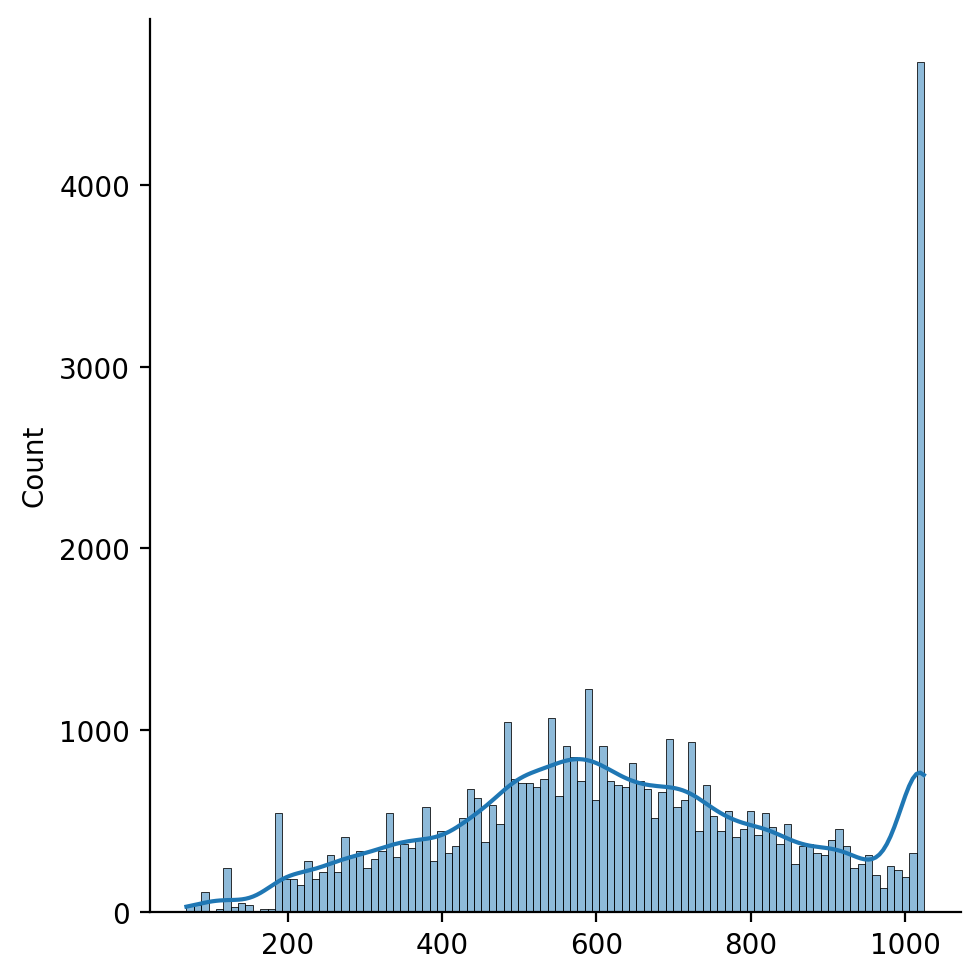

In [15]:
import seaborn as sns

#visualize the length of the songs

length = []
for song in dataset:
    length.append(len(song))
    
sns.displot(length, kde=True, bins=100)

In [ ]:
print(dataset[0])

['<style>', 'Jazz', 'Tonality', 'C major', '<start>', '|:', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C#', 'o', '|', '.', '4.0', 'C#', 'o', '|', '.', '4.0', 'D', 'm7', '|', '.', '4.0', 'G', 'dom7', '|', '.', '4.0', 'C', 'maj', '|', 'Repeat_1', '.', '4.0', 'C', 'maj', ':|', '|', 'Repeat_2', '.', '2.0', 'F#', 'm7', '.', '2.0', 'B', 'dom7', '|', '.', '4.0', 'E', 'maj', '|', '.', '2.0', 'F#', 'm7', '.', '2.0', 'B', 'dom7', '|', '.', '4.0', 'E', 'maj', '|', '.', '2.0', 'F#', 'm7', '.', '2.0', 'B', 'dom7', '|', '.', '4.0', 'E', 'm7', '|', '.', '4.0', 'A', 'dom7', '|', '.', '4.0', 'D', 'dom7', '|', '.', '4.0', 'G', 'dom7', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'Eb', 'o', '|', '.', '4.0', 'Eb', 'o', '|', '.', '4.0', 'D', 'm7', '|', '.', '4.0', 'G', 'dom7', '|', 'Repeat_0', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', ':|', '|', 'Repeat_0', '.', '4.0', 'E', 'm7', '|', '.', '4.0', 'A', 'dom7', '|', '.', '4.0', 'D', 'm7', '

In [17]:
#Add the <pad> token to the dataset and to the midi_voicing_dataset, max length is 1024
length = 1024

for i, song in enumerate(dataset):
    if len(song) < length:
        for j in range(length - len(song)):
            song.append('<pad>')

for i, song in enumerate(midi_dataset):
    if len(song) < length:
        for j in range(length - len(song)):
            song.append([0, 0, 0, 0, 0, 0, 0, 0])

print(len(dataset), len(midi_dataset))
    

48060 48060


In [18]:
import numpy as np
dataset = np.array(dataset, dtype=object)
midi_dataset = np.array(midi_dataset, dtype=object)
meta_augmented = np.array(meta_augmented, dtype=object)
print(dataset.shape, midi_dataset.shape, meta_augmented.shape)

#save the dataset
np.save('../data/formatted/dataset.npy', dataset)
np.save('../data/formatted/midi_dataset.npy', midi_dataset)
np.save('../data/formatted/meta_augmented.npy', meta_augmented)


(48060, 1024) (48060, 1024, 8) (48060,)
